In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank_df = pd.read_csv("Churn_Modelling.csv")

bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check for any missing values in the dataset
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# Dataset information
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
bank_df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

The data collected for this analysis was evenly distributed between men and women

In [7]:
# Remove columns
bank_df = bank_df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Where most people were from
bank_df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

This data was collected from 3 European countries, with half of them from France and the rest from Germany and Spain

In [10]:
bank_df["Exited"].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

From this we can see that 20% of the customers churned while 80% remained.

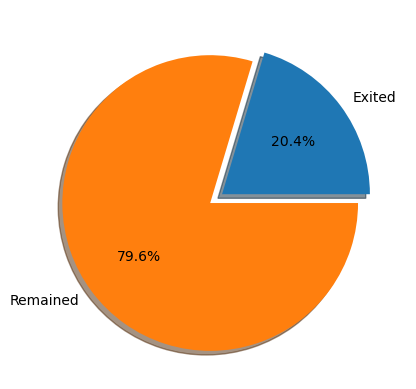

In [14]:
size = [bank_df.Exited[bank_df["Exited"] == 1].count(), bank_df.Exited[bank_df["Exited"] == 0].count()]
labels= ["Exited", "Remained"]
explode = (0,0.1)
plt.pie(size, labels=labels, explode=explode, shadow=True, autopct='%1.1f%%')
plt.show()

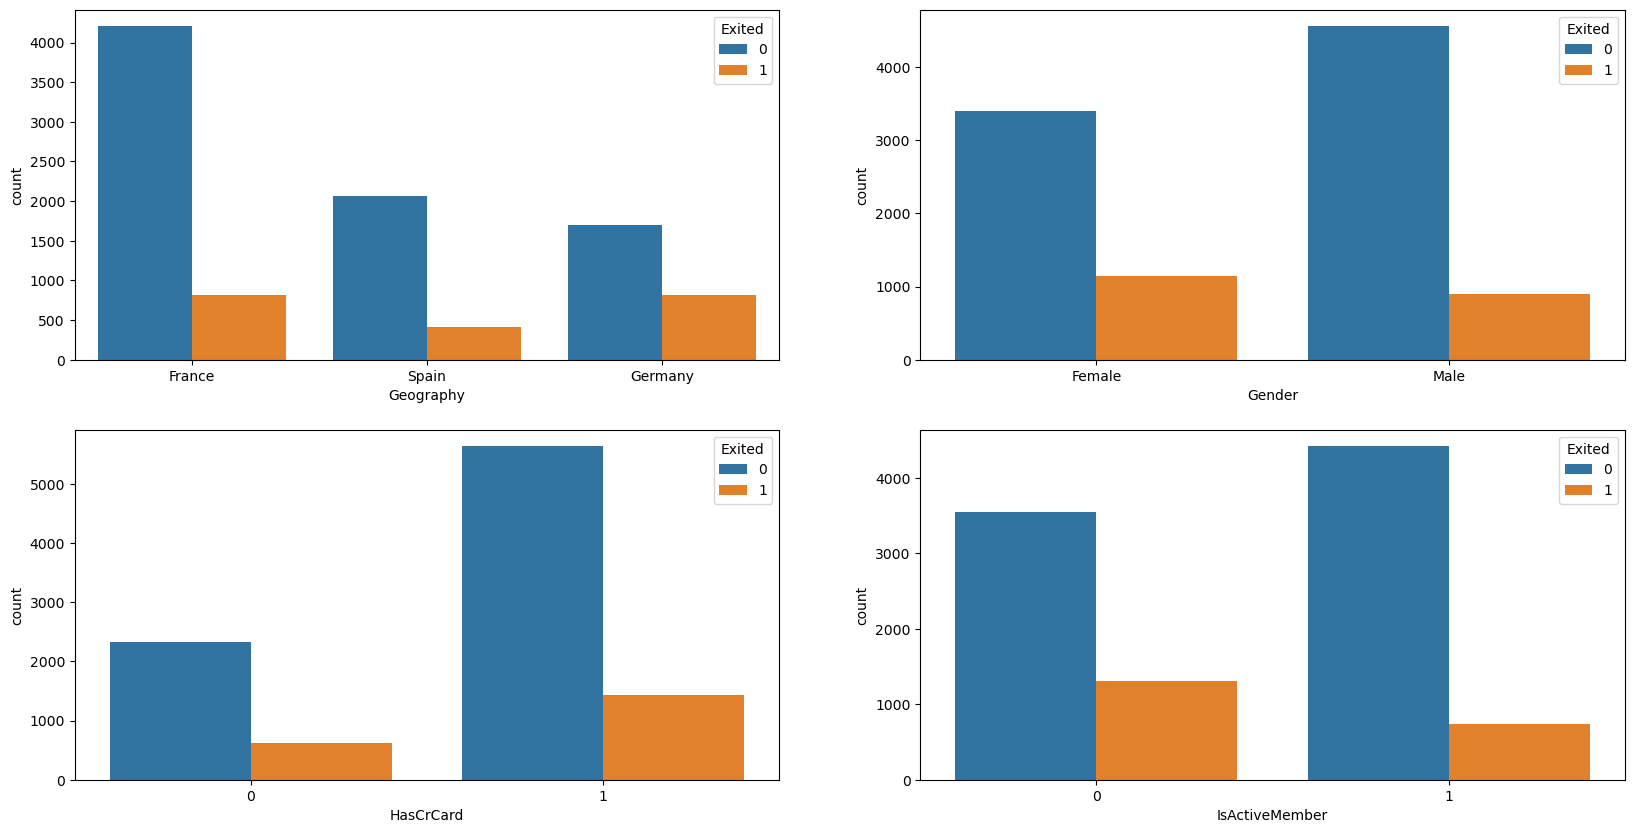

In [17]:
# The number of people who churned with respect to different columns
fig, axs = plt.subplots(2,2, figsize=(20,10))
sns.countplot(x="Geography", hue="Exited", data=bank_df, ax=axs[0][0])
sns.countplot(x="Gender", hue="Exited", data=bank_df, ax=axs[0][1])
sns.countplot(x="HasCrCard", hue="Exited", data=bank_df, ax=axs[1][0])
sns.countplot(x="IsActiveMember", hue="Exited", data=bank_df, ax=axs[1][1])

plt.show()

From this information, it is quite clear that:
  * All the countries had a signifant number of people who exited from the bank.
  * Most customers stayed loyal to the bank regardless of location, if they had a credit card or if they were active members of the bank.
  * It was of no surprise that people with credit cards had a higher number of those who exited from the bank, maybe because they had debts that they had no cleared.
  * Gender played no role in deciding who exited and who stayed.

In [18]:
bank_df.groupby("HasCrCard").Exited.value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: Exited, dtype: int64

In [19]:
bank_df.groupby("Exited").EstimatedSalary.mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

Salary also never played a role as we can even see that those who received better and higher salaries were infact those who exited from the bank.

In [20]:
bank_df.groupby("Exited").Age.mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

Age too was a neutral entity.

These columns will not be used in the prediction of those who will churn.

In [22]:
bank_df.groupby("Exited").Balance.mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

In [23]:
bank_df.groupby("Exited").CreditScore.mean()

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [24]:
categorical_cols = ["Geography","Gender"]

encoded_cols = pd.get_dummies(data=bank_df, columns=categorical_cols)

In [26]:
bank_df = encoded_cols

bank_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [27]:
# The features and the result
X = bank_df.drop("Exited", axis=1)
y = bank_df["Exited"]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train, y_train

(      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
 9069          619   32       4  175406.13              2          1   
 2603          643   34       7  160426.07              1          0   
 7738          561   33       6       0.00              2          0   
 1579          618   41       8   37702.79              1          1   
 5058          714   37       9  148466.93              2          0   
 ...           ...  ...     ...        ...            ...        ...   
 5734          768   54       8   69712.74              1          1   
 5191          682   58       1       0.00              1          1   
 5390          735   38       1       0.00              3          0   
 860           667   43       8  190227.46              1          1   
 7270          697   51       1  147910.30              1          1   
 
       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
 9069               1        172792.43                 

In [29]:
# Scaling the train data
from sklearn.preprocessing import StandardScaler

# Instantiate the model
scaler = StandardScaler()

# Fit and transform the model
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


In [31]:
X_test_scaled

array([[-0.52014175, -0.66770996, -0.71248217, ..., -0.56451866,
        -0.91678285,  0.91678285],
       [-0.24328152,  0.38556101, -1.39965353, ..., -0.56451866,
        -0.91678285,  0.91678285],
       [-0.46887134,  0.48131292, -0.36889649, ...,  1.77142063,
         1.09077084, -1.09077084],
       ...,
       [-0.38683868, -0.66770996,  0.66186055, ..., -0.56451866,
        -0.91678285,  0.91678285],
       [-0.68420707, -0.76346187, -1.05606785, ..., -0.56451866,
        -0.91678285,  0.91678285],
       [-1.16614895, -1.62522903,  1.69261759, ..., -0.56451866,
         1.09077084, -1.09077084]])

### Making predictions using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr = LogisticRegression()

# Fit the model
lr.fit(X_train_scaled, y_train)

# Check score
lr.score(X_test_scaled, y_test)

0.812

### Making predictions using Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the estimator
rfc = RandomForestClassifier()

# Fit the model to the training data
rfc.fit(X_train_scaled, y_train)

# Check score
rfc.score(X_test_scaled, y_test)

0.8666666666666667